In [30]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt 

from metavision_core.event_io.raw_reader import RawReader
from metavision_core.event_io.py_reader import EventDatReader

In [31]:
#Choose Raw Event File
input_path_raw = "marker.raw"

# open a file
record_raw = RawReader(input_path_raw)
print(record_raw)  # show some metadata

#Get Events
events = record_raw.load_n_events(50)  # load the 50 next events
events_by_time = record_raw.load_delta_t(10000)  # load the next 10ms of data

RawReader(marker.raw)
current time : 0us done : False
current event index : 0
_begin_buffer 0,_end_buffer_ 0,  buffer_size 100000000


In [48]:
#Extract Event Data Coordinates
y_values = events['y']
x_values = events['x']

#Create Additional Parameters
#theta = np.linspace(0,359,num=360)
#rho = np.zeros((theta.shape[0],x_values.shape[0]))

height, width = record_raw.get_size()
#theta


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [63]:
#Hough Transform
theta_res = np.pi/90
rho_res = 2
rho_max = rho_res*np.ceil(np.sqrt((height-1)^2+(width-1)^2)/rho_res)
rho_scale = np.arange(0,rho_max+rho_res,rho_res)
theta_max = 2*np.pi/theta_res
#print(theta_max)
theta_scale = theta_res * np.linspace(1,theta_max-1,num = int(theta_max-1))
H = np.zeros((rho_scale.shape[0], theta_scale.shape[0]))

#for theta = 1:length(thetaScale)
#                rho = round(col*cos(thetaScale(theta)) + row*sin(thetaScale(theta)));
#                if rho > 0
#                    rhoIndex = floor((rho/2)+1);
#                    H(rhoIndex,theta) = H(rhoIndex,theta)+1;
print(theta_scale.shape[0])
for i in range(x_values.shape[0]):
    for j in range(0,theta_scale.shape[0]):
        rho = round(x_values[i]*np.cos(np.deg2rad(j)) + y_values[i] * np.sin(np.deg2rad(j)))
        if rho > 0:
            rho_index = np.floor((rho/2)+1)
            print(rho_index)
            print(j)
            H[int(rho_index)][int(j)] = H[int(rho_index)][int(j)]+1
        #print('b')
    

plt.plot(H)

179
179.0
0


IndexError: index 179 is out of bounds for axis 0 with size 16

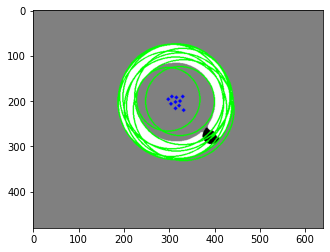

In [ ]:
# Test attempt at circular hough transform
# Initial tests reveal several semi-cencentric circles along all polarity net change, not current frame change

# to get a single 'time frame' load next 10 ms of data together and build an image like this

img1 = cv2.imread('circle.jpg',0)
img1 = cv2.medianBlur(img1,9)
cimg = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img1,cv2.HOUGH_GRADIENT,1,10,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
plt.imshow(cimg)


True

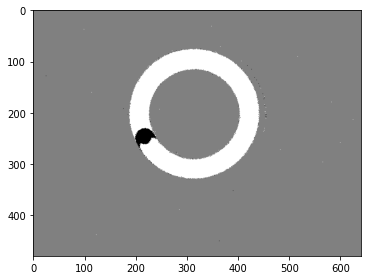

In [ ]:
#attempt 2 circle hough

height, width = record_raw.get_size()

#  iteration
# load 10M events by batches of 50ms:
while not record_raw.is_done() and record_raw.current_event_index() < 1E7:
    # load the next 50 ms worth of events
    events = record_raw.load_delta_t(50000)
    
    im = viz_events(events, height, width)
    img1 = cv2.medianBlur(img1,9)
    cimg = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)

    circles = cv2.HoughCircles(img1,cv2.HOUGH_GRADIENT,1,10,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)



plt.imshow(im)
plt.tight_layout()
cv2.imwrite('circle.jpg',im)